# 📈 Análise de vendas de comércio eletrônico


#### Sobre o conjunto de dados

> 
Descrição:
> 
Explore um conjunto de dados abrangente de vendas de e-commerce, abrangendo uma variedade de categorias de produtos, preços, avaliações de clientes e tendências de vendas no último ano. Este conjunto de dados é ideal para analisar tendências de mercado, comportamento do cliente e desempenho de vendas. Explore os dados para descobrir insights que podem otimizar listagens de produtos, estratégias de preços e campanhas de marketing


> Análises potenciais:

+ Identicação de s categorias de produtos de melhor desempenho.
+ Analisde o impacto dos preços nas vendas e avaliações de clientes.
T tendências e padrões de vendas sazonai
+ Modelos de previsão.
+ Recomendaçõess.



#### Colunas do DF:

<details>
  <summary>Expandir colunas</summary>
  <p><strong>product_id</strong>: Identificador exclusivo para cada produto.</p>
  <p><strong>product_name</strong>: Nome do produto.</p>
  <p><strong>category</strong>: Categoria do produto.</p>
  <p><strong>price</strong>: Preço do produto.</p>
  <p><strong>review_score</strong>: Pontuação média de avaliação do cliente (1 a 5).</p>
  <p><strong>review_count</strong>: Número total de avaliações.</p>
  <p><strong>sales_month_1 a sales_month_12</strong>: Dados de vendas mensais para cada produto no último ano.</p>
</</detais> 
 
e vendas sazonais.valiações.

In [69]:
#Importando as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import ipywidgets as widgets
import joblib

#Bibliotecas para analise de regressão linear
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
#Leitura do df 
df = pd.read_csv('../data/ecommerce_sales_analysis_input.csv')

display(df)

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394


## 1° Analise Exploratoria

In [71]:
#Analise das colunas e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [72]:
df.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000



**Analise inicial: Foi possivel validar as colunas e tipos de dados que cada coluna possui e é percepitivel que este df trata-se de uma base de dados ja "Tratada". Devido a não necessidade de nenhum ajuste inicial, por exemplo:  tido de dado e valores nulos**

> Ações necassarias: Criação de features para analise dos comportamentos dos dados (Analise descritiva)

## 2° Analise Descritiva

### Feature Engineering


#### Criação de novas colunas com base em estatísticas agregadas:

> Média de vendas mensais: Coluna que represente a média de vendas por mês para cada produto.

> Variância das vendas: Coluna com a variância das vendas mensais para dar uma ideia de quanto as vendas variam ao longo do tempo.

> Proporção do preço em relação à média da categoria: Coluna para calcular o preço de um produto em relação à média dos preços da categoria.

> Log-transform: Aplicar uma transformação logarítmica em variáveis como preço ou vendas totais pode ajudar a estabilizar a variância e tornar os padrões mais visíveis.

> Faixas de preço: Criação de categorias para faixas de preço, como "baixo", "médio" e "alto".

> Mês de pico de vendas: "Analise de sazonalidade" para identificar o mês em que cada produto teve o pico de vendas.

> Interação entre preço e avaliação: Mutilicar o preço pela pontuação de avaliação para entender o impacto combinado no desempenho do produto.

> Quantidade total vendida: Coluna com a soma de todas as unidades vendidas de cada produto.

> Valor total vendido: Coluna com a multiplicação da coluna quantidade vendida com a coluna price

> Encoding de categorias: vamos utilizar o One-Hot Encoding, pois pretendemos usar modelos de aprendizado de máquina, o One-Hot Encoding pode ser mais apropriado para categorizar as colunas, ao inves de Label Encoding que é mais apropriado para categorizar ordem implicita.

##### Exemplos de Encoding:
1. Label Encoding (Codificação por Rótulos):
Quando usar: É útil quando as categorias têm uma ordem implícita ou quando você deseja manter as categorias em uma única coluna com valores numéricos.
Como funciona: Cada categoria única é substituída por um número inteiro. Por exemplo, se você tem as categorias "Baixo", "Médio" e "Alto", elas podem ser codificadas como 0, 1 e 2, respectivamente.
Limitações: Essa abordagem cria uma ordem numérica que pode não fazer sentido se as categorias forem nominais (sem ordem intrínseca).



2. One-Hot Encoding:
Quando usar: É mais adequado quando as categorias são nominais, ou seja, não têm uma ordem intrínseca, e você não deseja impor uma ordem artificial. Também é a abordagem mais comum em aprendizado de máquina.
Como funciona: Cria colunas binárias (0 ou 1) para cada categoria única, onde 1 indica a presença da categoria para uma linha específica.
Limitações: Pode resultar em um grande número de colunas se houver muitas categorias diferentes.




```python

# Exemplo sintaxe: Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['categoria_encoded'] = label_encoder.fit_transform(df['categoria


```

```python
# Exemplo sintaxe: One-Hot Encoding

df = pd.get_dummies(df, columns=['categoria'], prefix='cat')es.



In [73]:
# Criação de duas colunas com a media de vendas mensais e Variancia das vendas:
df['mean_sales'] = df[[f'sales_month_{i}' for i in range(1, 13)]].mean(axis=1)
df['variance_sales'] = df[[f'sales_month_{i}' for i in range(1, 13)]].var(axis=1)

In [74]:
# Criação de coluna com a proporção do preço em relação a media da categoria
df['price_to_category_mean'] = df['price'] / df.groupby('category')['price'].transform('mean')

In [75]:
#Criação de duas features [Qtd.Total vendido] e [Vlr.Total vendido]
df['quantity_total_ sold'] = df[['sales_month_1', 'sales_month_2', 'sales_month_3',\
                              'sales_month_4','sales_month_5','sales_month_6',\
                              'sales_month_7','sales_month_8','sales_month_9',\
                              'sales_month_10','sales_month_11','sales_month_12']].sum(axis=1)

df['amount_total_sold'] = df['quantity_total_ sold'] * df['price']

In [77]:
#Transformação logaritimica nas variaveis de preco e venda para tonar os padõres mais visiveis
df['log_price'] = np.log1p(df['price'])
df['log_total_sales'] = np.log1p(df['amount_total_sold'])

In [78]:
#Criação de categorias
bins = [0, 100, 300, np.inf]
labels = ['Low', 'Medium', 'High']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

In [79]:
#Analise de sazonalidade 
df['peak_month'] = df[[f'sales_month_{i}' for i in range(1, 13)]].idxmax(axis=1).str.extract(r'(\d+)').astype(int)

In [80]:
#Interação entre preço e avaliação: 
df['price_review_interaction'] = df['price'] * df['review_score']

In [ ]:
#Gerando relatorio Profiling Report para ler as fetures e identificar media, mediana, desvio padrão e etc..
profile = ProfileReport(df, title="Profiling Report") 
#profile.to_file("profiling_report.html") # Salvando arquivo HTML
profile # Devido ao problema de visualização do girhub, o relatorio HTML foi salvo como profiling_report.html

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

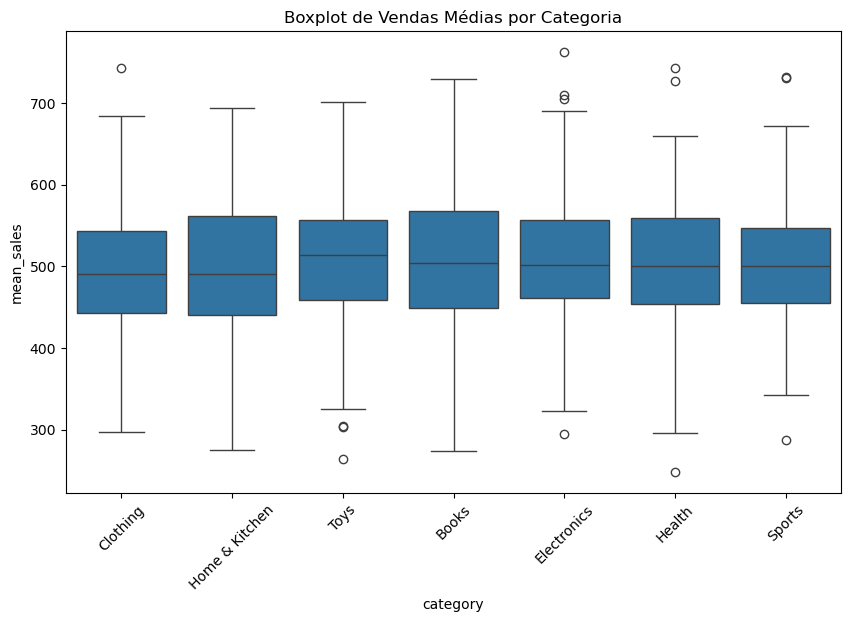

In [81]:
#Distribuição de vendas médias por categoria 
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='mean_sales', data=df)
plt.title('Boxplot de Vendas Médias por Categoria')
plt.xticks(rotation=45)
plt.show()

##### Conclusão boxplot
As categorias apresentam distribuições de vendas relativamente equilibradas, exceto Books, que mostra maior variabilidade, e Electronics, que tem outliers indicando vendas pontuais altas.
Pode ser interessante investigar mais a fundo os outliers em Electronics para entender o que impulsionou as vendas nesses casos.

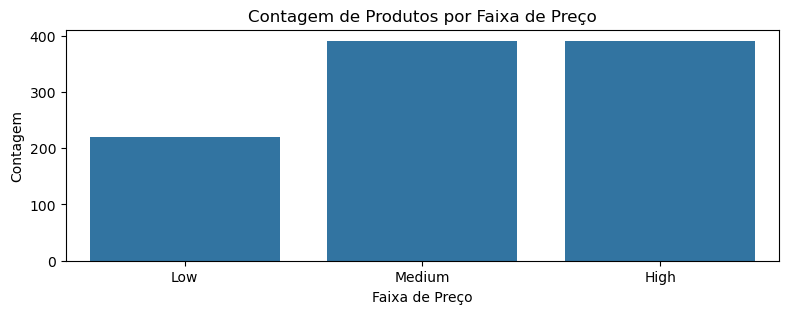

<Figure size 640x480 with 0 Axes>

In [82]:
#Criação de Categorias (Faixas de Preço)
plt.figure(figsize=(9.2, 3))
sns.countplot(x='price_range', data=df)
plt.title('Contagem de Produtos por Faixa de Preço')
plt.xlabel('Faixa de Preço')
plt.ylabel('Contagem')
plt.show()

plt.tight_layout()
plt.show()

##### Interpretação dos Padrões:

+ Distribuição da faixa de preço: Este grafico apenas confirma a analise de distribuição de valores, porem sem a plicação logarítmica nos preços, o que mostra consistência na conclusão da analise do conjuntos de graficos no 'profile.html' onde conseguimos ver a adistribuição no log_total_sales e log_price. A distribuição do volume de produtos e valor estão classificados entre valores medios e altos em relação a todo volume de produtos, ou seja possuimos uma grande quantidade de produtos com preco medio e alta em relação a todos os produtos do e-comerce.

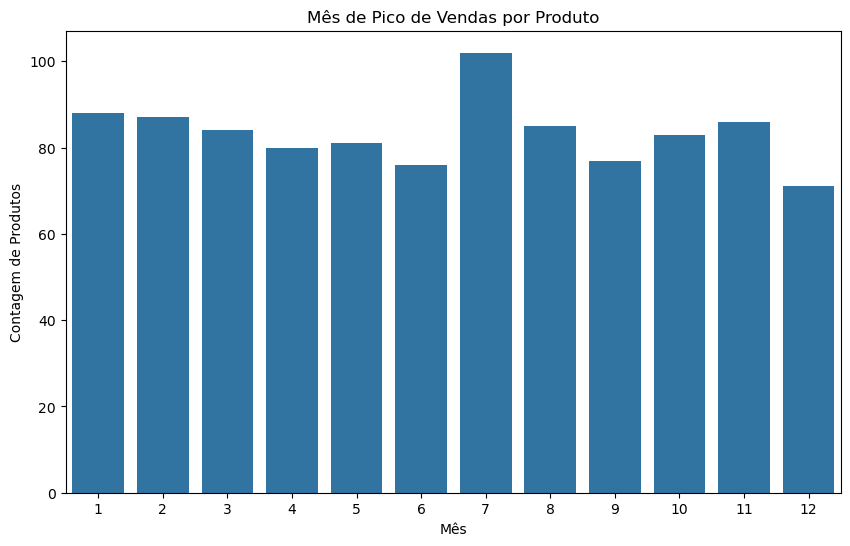

In [83]:
# Analise de Sazonalidade (Mês de Pico de Vendas):
plt.figure(figsize=(10, 6))
sns.countplot(x='peak_month', data=df)
plt.title('Mês de Pico de Vendas por Produto')
plt.xlabel('Mês')
plt.ylabel('Contagem de Produtos')
plt.show()

##### Analise sazonalidade

1. Interpretação:

+ Mês 7 (Julho): É claramente o mês com o maior número de produtos atingindo seu pico de vendas. Isso pode indicar uma forte demanda sazonal, possivelmente devido a promoções de meio de ano ou férias.

+ Demais Meses: Há uma distribuição relativamente uniforme para os outros meses, com exceção do mês 12 (Dezembro), que tem a menor contagem de produtos atingindo o pico de vendas. Isso pode ser um indicativo de que alguns produtos não têm um aumento significativo de vendas durante o período natalino.

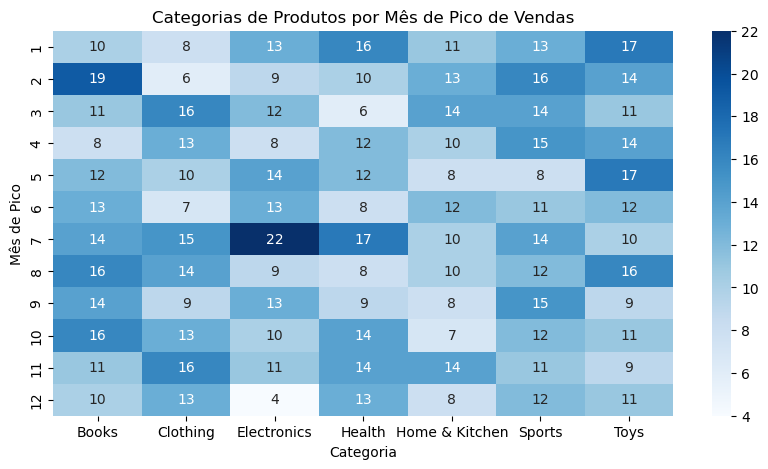

In [84]:
# Cria uma tabela cruzada (crosstab) para contar as categorias por mês de pico de vendas
category_peak_month = pd.crosstab(df['peak_month'], df['category'])

# Cria um gráfico de calor (heatmap)
plt.figure(figsize=(10, 5))
sns.heatmap(category_peak_month, cmap='Blues', annot=True, fmt='d')
plt.title('Categorias de Produtos por Mês de Pico de Vendas')
plt.xlabel('Categoria')
plt.ylabel('Mês de Pico')
plt.show()

##### Interpretação dos Padrões:

+ Com o mapa de calor conseguimos entender quais foram as categorias mais vendidades durantes os meses, é notavel a quantidade de vendas de eletronicos no mes 7 (Julho) o que impactou significativamente nas vendas do mês, devido a alta correlação. O mesmo impcto em eletetronicos ocorreu em Dezembro, porem o impacto foi o contrario do mês de Julho.

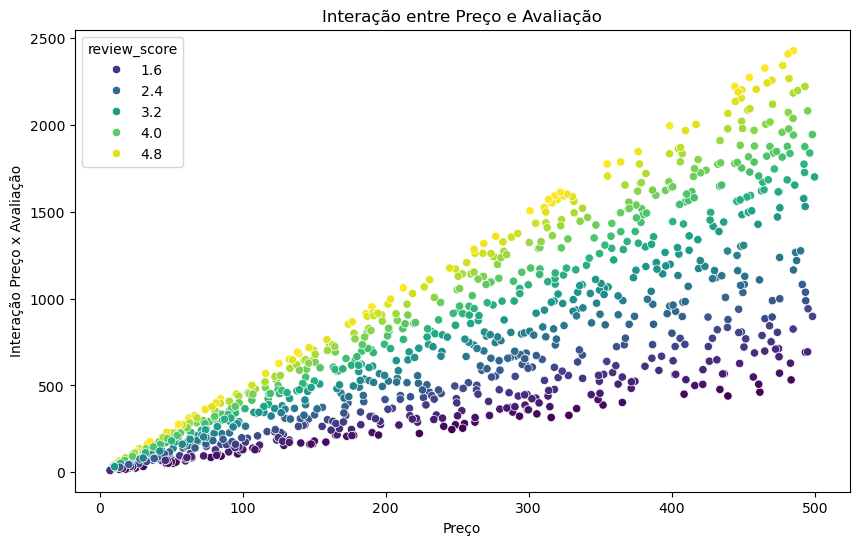

In [85]:
#Gráfico de dispersão para explorar a relação entre preço, avaliação e a interação entre eles
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='price_review_interaction', hue='review_score', data=df, palette='viridis')
plt.title('Interação entre Preço e Avaliação')
plt.xlabel('Preço')
plt.ylabel('Interação Preço x Avaliação')
plt.show()

##### Interpretação dos Padrões:

O gráfico mostra a relação entre o preço e a avaliação de um produto. O eixo x representa o preço do produto, e o eixo y representa a avaliação média do produto. A linha no gráfico mostra a tendência geral da relação entre o preço e a avaliação.

No geral, o gráfico mostra que há uma correlação positiva entre o preço e a avaliação do produto. Isso significa que, em geral, produtos com preços mais altos tendem a ter avaliações mais altas.

### Conclusão analise exploratoria e descritiva

1. count: Todas as colunas têm 1000 registros. Isso indica que não há valores ausentes nos dados.

2. mean (média):
O preço médio dos produtos (price) é 247,67.
A pontuação média das avaliações (review_score) é 3,03 o que sugere que, em média, os produtos têm uma avaliação satisfatória.
As vendas médias por mês variam entre 487,19 e 514,80, mostrando uma certa consistência nas vendas ao longo dos meses.


3. std (desvio padrão):
O desvio padrão do preço (price) é 144,61, indicando que há uma grande variação nos preços dos produtos. Esse desvio representa 58% do valor medio do produto gerando uma grande dispeção nos preços.

4. A pontuação de avaliação tem um desvio padrão de 1,17, sugerindo alguma dispersão nas avaliações dos produtos.
As vendas mensais têm desvios padrão em torno de 280-290, o que pode indicar que há variações consideráveis nas vendas mensais entre os produtos.


5. min e max:
O menor preço registrado é 7,29, enquanto o maior é 499,86. Isso sugere uma ampla faixa de preços.
A pontuação de avaliação varia de 1 a 5, com alguns produtos recebendo avaliações baixas (1) e outros recebendo a pontuação máxima (5).
As vendas mensais têm um mínimo de 0, indicando que alguns produtos não venderam nada em certos meses, enquanto o máximo é 1000, mostrando que alguns produtos tiveram vendas muito altas.

6. Quartis (25%, 50%, 75%):
Para o preço, 25% dos produtos têm preços abaixo de 121,81, e 75% dos produtos têm preços abaixo de 373,43.
A pontuação da avaliação mediana é 3,1, o que confirma que a maioria dos produtos tem uma avaliação ao redor da média.
As vendas mensais medianas variam, mas a maioria está na faixa de 479 a 543, o que mostra uma distribuição relativamente equilibrada das vendas.

7. Correlação de variaves:
Notei que em alguns meses a correlação entre categoria e mes de venda ficam mais fortes entre os meses do final de ano, o que sugere que alguns produtos são mais vendidos nos ultimos meses do ano, certamente em datas comemorativas.

#### Conclusões gerais:

#### Sobre o DF:
+ O dataset possui uma certa consistencia nos dados, não foi identificador outliers relevantes dentro do periodo de vendas de um ano, nem valores nulos, foi necessario aplicar as tecnicas de feature Engineering para identifica padrões e extrair insights na analise descritiva.

+ Principais percepções: As categorias apresentam distribuições de vendas relativamente equilibradas, exceto Books, que mostra maior variabilidade, e Electronics, que tem outliers indicando vendas pontuais altas.

    - Sazonalidade: O Mês de julho claramente teve o maior número de produtos atingindo seu pico de vendas equanto os demais meses se manteve uniforme com exceção de Dezembro que tem a menor contagem de produtos,s. Isso pode ser um indicativo de que alguns produtos não têm um aumento significativo de vendas durante o período natalin
    - Iteração entre preço e avalidação: Existe uma correlação entre valor do produto e avaliação, indicando que os produtos melhor avaliados são os de mairo preço, ou seja o preço baixo do produto nao indica uma satifação maior na compra.




+ Pontuação de avaliação: A pontuação média de avaliação está perto de 3, o que pode sugerir que há espaço para melhoria na qualidade ou no atendimento relacionado aos produtos.

+ Variação nas vendas mensais: Embora haja consistência nas vendas médias mensais, o desvio padrão alto e os valores mínimos e máximos indicam que alguns produtos vendem muito bem, enquanto outros podem não estar vendendo tão bem, ou mesmo nada, em certos meses.

## 3° Analise preditiva: Modelos de ML

#### Modelagem dos dados

In [86]:
# Criação de One-Hot Encoding para cada categoria de produto
X = pd.get_dummies(df, columns=['category'], prefix='cat')

# Definindo as variáveis independentes (X) e a variável dependente (y)
X = df.drop(columns=['amount_total_sold'])  # Excluindo apenas a coluna 'amount_total_sold' para não inveizar o modelo
y = df['amount_total_sold']  # Variável que desejamos prever

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Salvando as bases de treino e teste para futura visualização
X_train.to_csv('../data/X_train_output.csv', index=False)
X_test.to_csv('../data/X_test_output.csv', index=False)
y_train.to_csv('../data/y_train_output.csv', index=False)
y_test.to_csv('../data/y_test_output.csv', index=False)

#### Considerações

1. **Proporção de Treino e Teste**
+ **Proporção Comum:** Um padrão frequentemente usado é 80% dos dados para treino e 20% para teste. Isso permite que o modelo seja treinado em uma amostra robusta, enquanto ainda é avaliado em um conjunto de dados significativo.
+ **Ajuste para Pequenos Conjuntos de Dados:** Se o conjunto de dados for pequeno, você pode considerar aumentar a proporção de dados de treino (por exemplo, 85% para treino e 15% para teste) para garantir que o modelo tenha dados suficientes para aprender.
+ **Ajuste para Grandes Conjuntos de Dados:** Para grandes volumes de dados, uma divisão de 70% para treino e 30% para teste também pode ser apropriada.

2. **Distribuição das Variáveis**
+ **Distribuição Similar:** A divisão deve preservar a distribuição das variáveis, especialmente da variável alvo (a que você deseja prever). Isso significa que tanto a base de treino quanto a de teste devem refletir a mesma variabilidade dos dados.
+ **Estratificação:** Se você tiver uma variável categórica importante, como classes desbalanceadas (por exemplo, muitas vendas baixas e poucas vendas altas), a divisão deve ser estratificada para garantir que ambas as bases contenham uma proporção representativa de cada categoria.

### Modelo de treino : Random Forest 

In [87]:
# Removendo colunas não numéricas
X_train = X_train.drop(columns=['product_name', 'category'])
X_test = X_test.drop(columns=['product_name', 'category'])

# Aplicando One-Hot Encoding na coluna 'price_range'
X_train = pd.get_dummies(X_train, columns=['price_range'], prefix='price_range')
X_test = pd.get_dummies(X_test, columns=['price_range'], prefix='price_range')

# Treinando o modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = model.predict(X_test)

# Avaliação do modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf= mean_squared_error(y_test, y_pred_rf)
print(f'MAE: {mae_rf}, MSE: {mse_rf}')


MAE: 3833.853735000113, MSE: 42981625.23801134


### Modelo de treino : Regressão Linear

In [88]:
# Instanciando o modelo
linear_model = LinearRegression()

# Treinando o modelo
linear_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_lr = linear_model.predict(X_test)

# Avaliação do modelo
mae_linear = mean_absolute_error(y_test, y_pred_lr)
mse_linear = mean_squared_error(y_test, y_pred_lr)
print(f'Regressão Linear - MAE: {mae_linear}, MSE: {mse_linear}')

Regressão Linear - MAE: 98874.35808477562, MSE: 18736420807.005943


### Modelo de treino : XGBoost Regressor

In [89]:
# Instanciando o modelo
xgb_model = XGBRegressor(random_state=42)

# Treinando o modelo
xgb_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação do modelo
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost Regressor - MAE: {mae_xgb}, MSE: {mse_xgb}')

XGBoost Regressor - MAE: 9945.714557031255, MSE: 180299575.99787697


### Modelo de treino : Gradient Boosting Regressor

In [90]:
# Instanciando o modelo
gbr_model = GradientBoostingRegressor(random_state=42)

# Treinando o modelo
gbr_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_gbr = gbr_model.predict(X_test)

# Avaliação do modelo
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f'Gradient Boosting Regressor - MAE: {mae_gbr}, MSE: {mse_gbr}')

Gradient Boosting Regressor - MAE: 6429.053754058648, MSE: 74975642.94017065


### Analise do melhor modelo

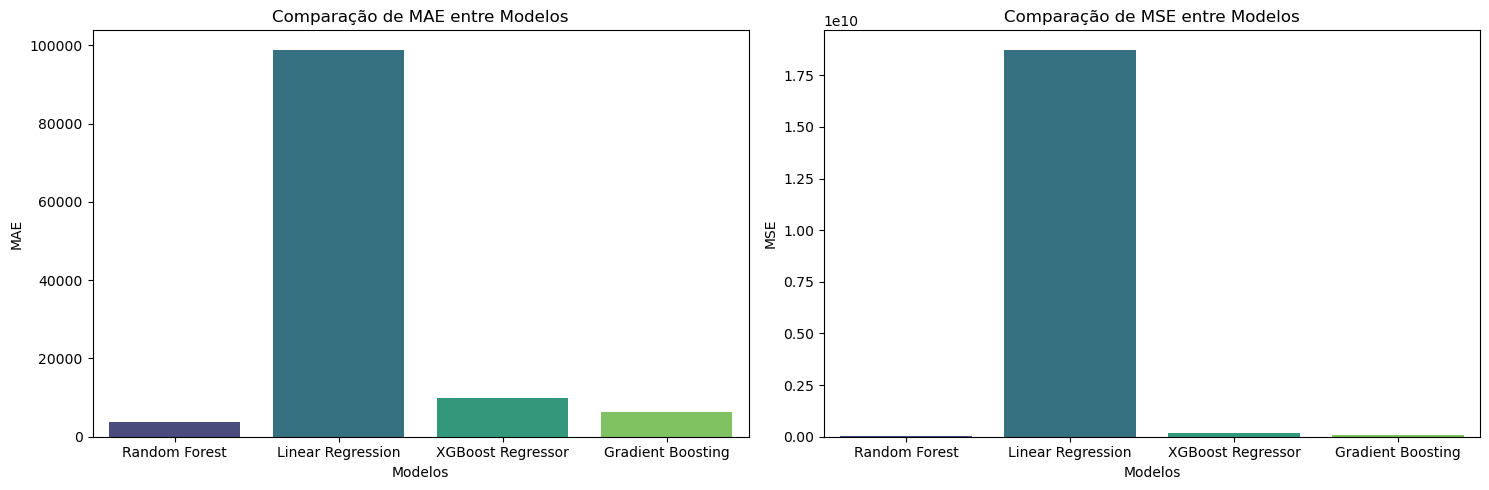

In [91]:
# Definindo os valores de MAE e MSE para cada modelo
model_names = ['Random Forest', 'Linear Regression', 'XGBoost Regressor', 'Gradient Boosting']
mae_values = [mae_rf, mae_linear, mae_xgb, mae_gbr]
mse_values = [mse_rf, mse_linear, mse_xgb, mse_gbr]

# Criando DataFrame para as métricas
metrics_df = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'MSE': mse_values
})

# Criando a figura e os eixos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Plotando o gráfico de MAE
sns.barplot(ax=axes[0], x='Model', y='MAE', data=metrics_df, hue='Model', dodge=False, palette='viridis', legend=False)
axes[0].set_title('Comparação de MAE entre Modelos')
axes[0].set_ylabel('MAE')
axes[0].set_xlabel('Modelos')

# Plotando o gráfico de MSE
sns.barplot(ax=axes[1], x='Model', y='MSE', data=metrics_df, hue='Model', dodge=False, palette='viridis', legend=False)
axes[1].set_title('Comparação de MSE entre Modelos')
axes[1].set_ylabel('MSE')
axes[1].set_xlabel('Modelos')

# Ajustando o layout
plt.tight_layout()

# Mostrar a figura
plt.show()

#### Conclusão do melhor modelo:

##### Interpretação dos Resultados
+ Random Forest: Apresentou os menores valores de MAE e MSE, indicando que é o modelo mais preciso entre os testados.
+ Regressão Linear: Teve os maiores valores de MAE e MSE, sugerindo que é o modelo menos preciso.
+ XGBoost Regressor e Gradient Boosting Regressor: Apresentaram resultados intermediários, com o Gradient Boosting sendo mais preciso que o XGBoost.


##### Análise dos Resultados

> MAE (Mean Absolute Error):

+ O MAE da Regressão Linear (98,874.36) é muito maior do que o da Random Forest (3,833.85). Isso indica que a Random Forest tem um desempenho significativamente melhor em termos de erro absoluto médio.


>MSE (Mean Squared Error):

+ O MSE da Regressão Linear (18,736,420,807.01) também é muito superior ao da Random Forest (42,981,625.24), mostrando que a Regressão Linear possui um erro quadrático médio bem maior, o que sugere que ela tem mais dificuldades em prever com precisão os valores extremos.

### Visualizações Preditivas

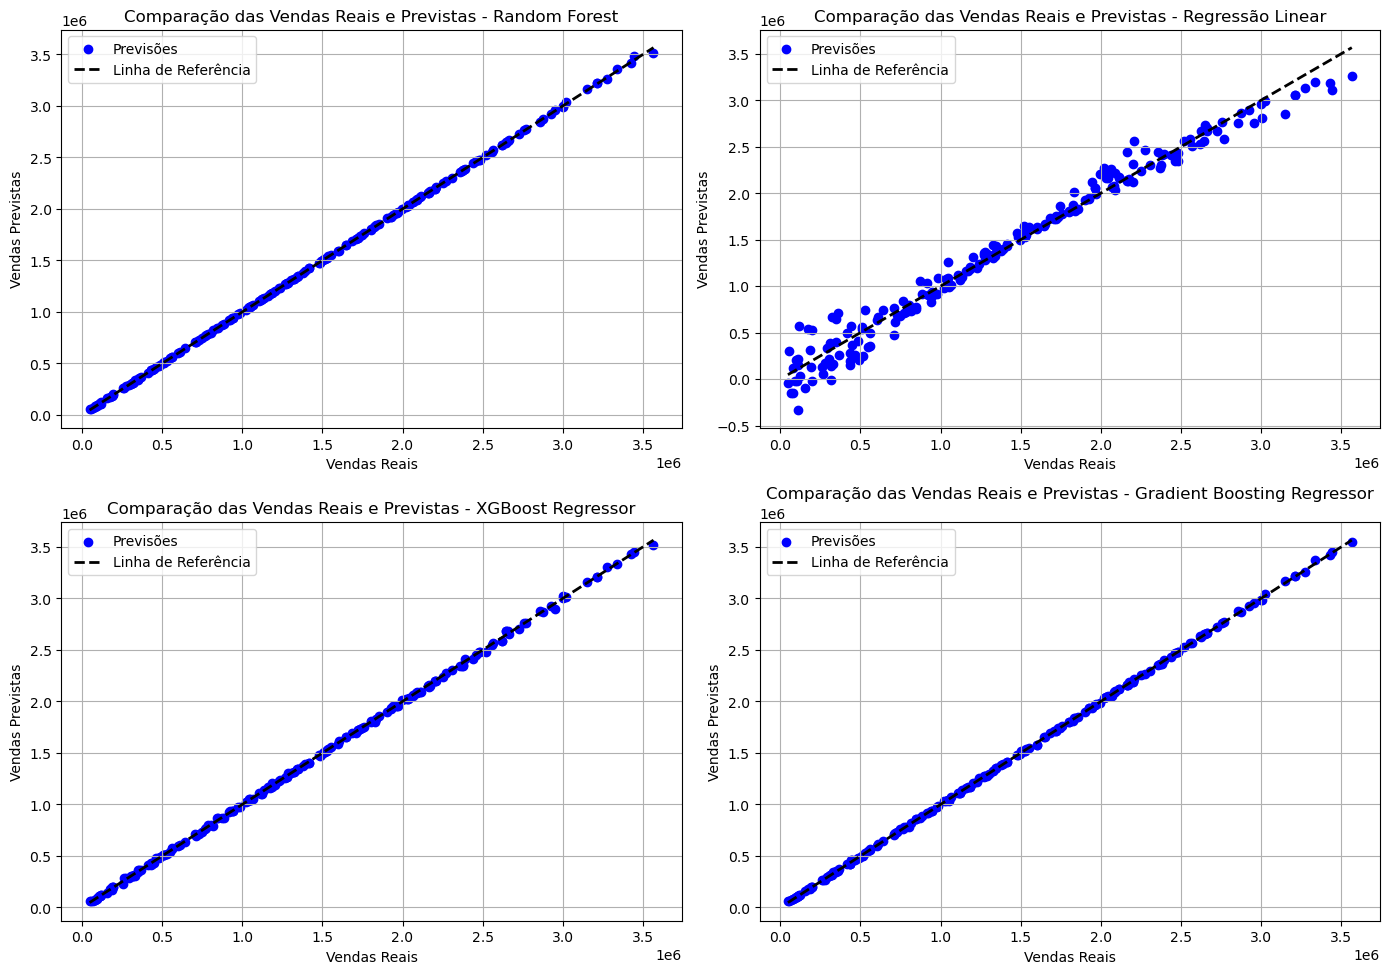

In [92]:
# Lista de previsões de cada modelo
model_predictions = {
    'Random Forest': y_pred_rf,
    'Regressão Linear': y_pred_lr,
    'XGBoost Regressor': y_pred_xgb,
    'Gradient Boosting Regressor': y_pred_gbr
}

# Criando a figura e os eixos para os 4 gráficos (2x2 layout)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Acessar cada eixo para plotar os gráficos
axes = axes.ravel()  # Ravel converte a matriz de eixos em uma lista para fácil iteração

for idx, (model_name, y_pred) in enumerate(model_predictions.items()):
    axes[idx].scatter(y_test, y_pred, c='blue', marker='o', label='Previsões')
    axes[idx].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Linha de Referência')
    axes[idx].set_title(f'Comparação das Vendas Reais e Previstas - {model_name}')
    axes[idx].set_xlabel('Vendas Reais')
    axes[idx].set_ylabel('Vendas Previstas')
    axes[idx].legend()
    axes[idx].grid(True)

# Ajusta o layout para não sobrepor os títulos e labels
plt.tight_layout()
plt.show()

### Salvando os Resultados do modelo Radom Forest

In [93]:
# Salvando as previsões
pd.DataFrame(y_pred_rf, columns=['Vendas Previstas']).to_csv('../vendas_previstas.csv', index=False)

# Salvando o modelo
joblib.dump(model, 'modelo_vendas_rf.pkl')


['modelo_vendas_rf.pkl']